In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pickle
from matplotlib.colors import ListedColormap
import os, sys
rootpath = os.path.join(os.getcwd(), '..')
sys.path.append(rootpath)
import gzip
from os.path import isfile
import json



# load path_figures from config_user.json if it exists
path_config = "../config_user.json"
if isfile(path_config):
    with open(path_config, 'r') as f:
        config = json.load(f)
else:
    with open("../config_default.json", 'r') as f:
        config = json.load(f)

path_figures = config["path_figures"]
print(path_figures)



./figures/


In [2]:
savefig_args = {
    'transparent': True,
    'format': 'pdf',
    'dpi': 300,
    'facecolor': 'none',
    'bbox_inches': 'tight',
    'pad_inches': 0
}
#mm to inches conversion
def mm_to_inches(mm):
    return mm / 25.4

## Raster Plots

In [3]:
with gzip.open("./data/FHN_2D_diffusion/raster_plot_row.gz", 'rb') as f:
    data_health = pickle.load(f)

In [4]:

# Add blank rows between binary rows 
N1, T1 = data_health.shape
gap1 = 1  # Gap size (number of blank rows)
data_health_with_blanks = np.zeros((N1 * (gap1 + 1), T1))
for i in range(N1):
    data_health_with_blanks[i * (gap1 + 1), :] = data_health[i, :]

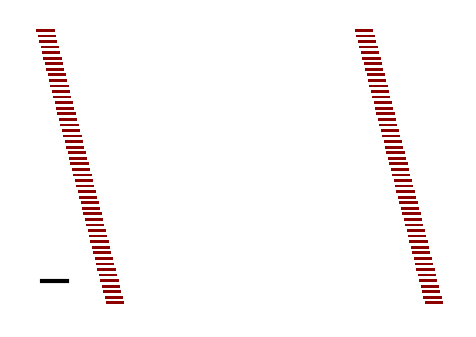

In [5]:

colors = [(0, 0, 0, 0),  
          (0.55, 0, 0, 1)]  
cmap = ListedColormap(colors)

width_mm = 36
##aspect_ratio = 6 / 4  # wanted aspect ratio
#height_mm = width_mm / aspect_ratio
height_mm =24

# Plot the data
plt.figure(figsize=(mm_to_inches(width_mm), mm_to_inches(height_mm)), facecolor='none', dpi=300)
plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)

plt.imshow(data_health_with_blanks, cmap=cmap, interpolation='none',  aspect='auto', rasterized=True)
plt.xticks([])  
plt.yticks([]) 
#plt.ylabel("Excitable cells ", fontsize=16)
#plt.xlabel("Time (a.u.)", fontsize=16)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Add a small black scalebar
scalebar_length = 100  # Length of the scalebar in data units
scalebar_height = 1  # Height of the scalebar in data units
scalebar_x = 50  # X position of the scalebar
scalebar_y = 90  # Y position of the scalebar

plt.plot([scalebar_x, scalebar_x + scalebar_length], [scalebar_y, scalebar_y], color='black', lw=1)

plt.savefig('FHN_2D_diffusion_toyeheart_p=0_raster_row.pdf', **savefig_args)



In [6]:
with gzip.open("./data/FHN_2D_diffusion/raster_plot_column.gz", 'rb') as f:
    data_health = pickle.load(f)

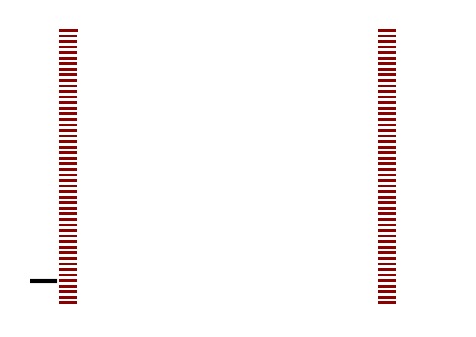

In [7]:


gap1 = 1  # Gap size (number of blank rows)
data_health_with_blanks = np.zeros((N1 * (gap1 + 1), T1))
for i in range(N1):
    data_health_with_blanks[i * (gap1 + 1), :] = data_health[i, :]



# Plot the data
plt.figure(figsize=(mm_to_inches(width_mm), mm_to_inches(height_mm)), facecolor='none', dpi=300)
plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)
plt.imshow(data_health_with_blanks, cmap=cmap, interpolation='none', aspect='auto', rasterized=True)
plt.xticks([])  
plt.yticks([])  
#plt.ylabel("Excitable cells ", fontsize=16)
#plt.xlabel("Time (a.u.)", fontsize=16)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
# Add a small black scalebar
scalebar_length = 100  # Length of the scalebar in data units
scalebar_height = 1  # Height of the scalebar in data units
scalebar_x = 0  # X position of the scalebar
scalebar_y = 90  # Y position of the scalebar

plt.plot([scalebar_x, scalebar_x + scalebar_length], [scalebar_y, scalebar_y], color='black', lw=1)


plt.savefig('FHN_2D_diffusion_toyheart_p=0_raster_column.pdf', **savefig_args)




## ECG

In [9]:
with gzip.open("./data/FHN_2D_diffusion/ECG_p=0.pkl.gz", 'rb') as f:
    ECG = pickle.load(f)

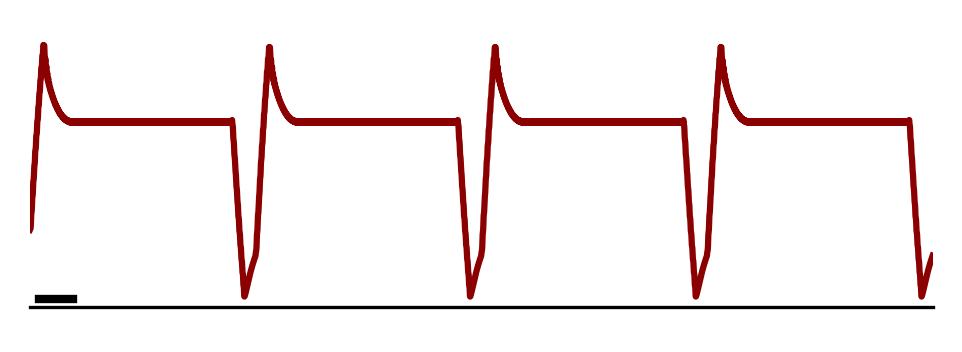

In [10]:
width_mm = 78
fig, ax = plt.subplots( figsize=(mm_to_inches(width_mm),mm_to_inches(height_mm)), facecolor='none', dpi=300)
plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)

ax.plot(ECG, color='darkred', rasterized=True)    

#ax.set_xticks([0,2,4,6,8])
#ax.set_yticks([-0.9, 0,2])
ax.set_yticks([])
ax.set_xticks([])
ax.set_ylim(-0.09,0.24)
ax.set_xlim(0,5200)
ax.spines['left'].set_visible(False)
##ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add a small black scalebar
scalebar_length = 200  # Length of the scalebar in data units
scalebar_height = 1  # Height of the scalebar in data units
scalebar_x = 50  # X position of the scalebar
scalebar_y = -0.08  # Y position of the scalebar

plt.plot([scalebar_x, scalebar_x + scalebar_length], [scalebar_y, scalebar_y], color='black', lw=2)
fig.savefig('FHN_2D_diffusion_toyheart_p=0_collective_signal.pdf', **savefig_args)

In [11]:
with gzip.open("./data/FHN_2D_diffusion/ECG_p=0.5.pkl.gz", 'rb') as f:
    ECG = pickle.load(f)

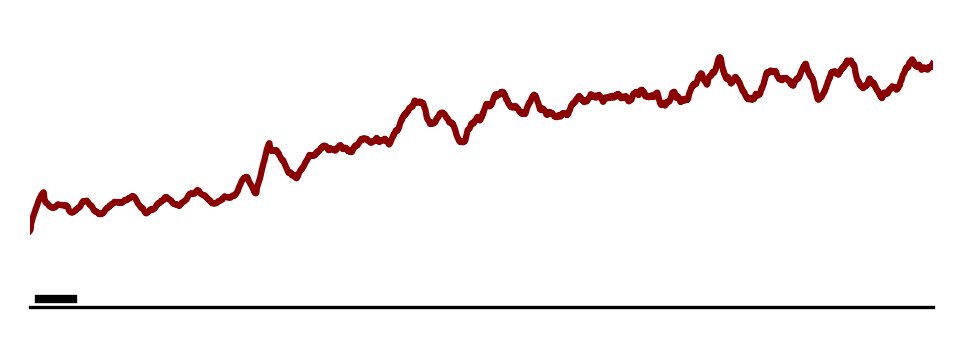

In [12]:
width_mm = 78
fig, ax = plt.subplots( figsize=(mm_to_inches(width_mm),mm_to_inches(height_mm)), facecolor='none', dpi=300)
plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)



ax.plot(ECG, color='darkred', rasterized=True)    

#ax.set_xticks([0,2,4,6,8])
#ax.set_yticks([-0.9, 0,2])
ax.set_yticks([])
ax.set_xticks([])
ax.set_ylim(-0.09,0.24)
ax.set_xlim(0,5200)
ax.spines['left'].set_visible(False)
##ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add a small black scalebar
scalebar_length = 200  # Length of the scalebar in data units
scalebar_height = 1  # Height of the scalebar in data units
scalebar_x = 50  # X position of the scalebar
scalebar_y = -0.08  # Y position of the scalebar

plt.plot([scalebar_x, scalebar_x + scalebar_length], [scalebar_y, scalebar_y], color='black', lw=2)
fig.savefig('FHN_2D_diffusion_toyheart_p=0.5_collective_signal.pdf', **savefig_args)

## Snapshots

In [13]:
with gzip.open("./data/FHN_2D_diffusion/snapshot_p=0.pkl.gz", 'rb') as f:
    u_sol_health = pickle.load(f)

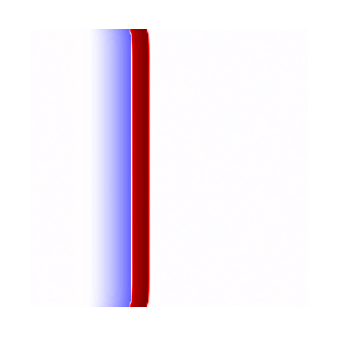

In [14]:
width_mm=24
fig, ax = plt.subplots( figsize=(mm_to_inches(width_mm),mm_to_inches(height_mm)), facecolor='none', dpi=300)
plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)

img = ax.imshow(u_sol_health, cmap="seismic", interpolation="bilinear", vmin=-np.max(np.abs(u_sol_health)), vmax=np.max(np.abs(u_sol_health)), aspect='auto', rasterized=True)
ax.spines['left'].set_visible(False) 
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  
fig.savefig('FHN_2D_diffusion_toyheart_p=0_snapshot.pdf', **savefig_args)
    

In [15]:
with gzip.open("./data/FHN_2D_diffusion/snapshot_p=0.5.pkl.gz", 'rb') as f:
    u_sol_arr_1 = pickle.load(f)

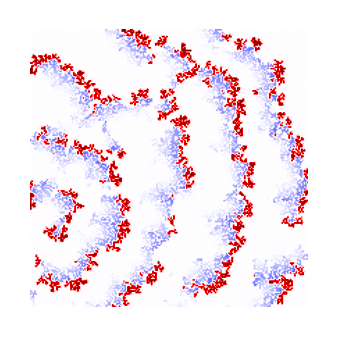

In [16]:
width_mm=24
fig, ax = plt.subplots( figsize=(mm_to_inches(width_mm),mm_to_inches(height_mm)), facecolor='none', dpi=300)
plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)

img = ax.imshow(u_sol_arr_1, cmap="seismic", interpolation="bilinear", vmin=-np.max(np.abs(u_sol_arr_1)), vmax=np.max(np.abs(u_sol_arr_1)), aspect='auto', rasterized=True)
ax.spines['left'].set_visible(False) 
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  
fig.savefig('FHN_2D_diffusion_toyheart_p=0.5_snapshot.pdf', **savefig_args)
    

## Spiral

In [17]:
filename_s= "./data/FHN_2D_diffusion/V_time_evolution_spiral.pkl.gz"
if os.path.isfile(filename_s):
    
    with gzip.open(filename_s, 'rb') as f:
        u_sol_spiral = pickle.load(f)
else:
    raise ValueError("file not found")

In [18]:
N_x=100
N_y=100
N=100*100

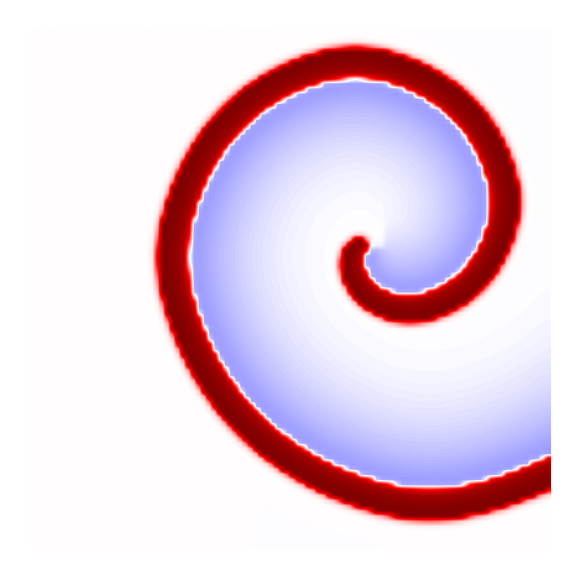

In [19]:
width_mm = 45
height_mm =45

# Plot the data
fig, ax= plt.subplots(figsize=(mm_to_inches(width_mm), mm_to_inches(height_mm)), facecolor='none', dpi=300)
plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)

ax.imshow(u_sol_spiral[:N].reshape(N_x, N_y), cmap='seismic',interpolation='bilinear', vmin=-np.max(np.abs(u_sol_spiral)), vmax=np.max(np.abs(u_sol_spiral)), aspect='auto', rasterized=True)
ax.spines['left'].set_visible(False) 
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  
fig.savefig('FHN_2D_diffusion_toyheart_spiral.pdf', **savefig_args)
    

## Chaos

In [20]:
filename_c= "./data/FHN_2D_diffusion/Aliev_Panfilov_2D_diffusion_chaos.pkl.gz"
if os.path.isfile(filename_c):
    
    with gzip.open(filename_c, 'rb') as f:
        u_sol_chaos= pickle.load(f)
else:
    raise ValueError("file not found")

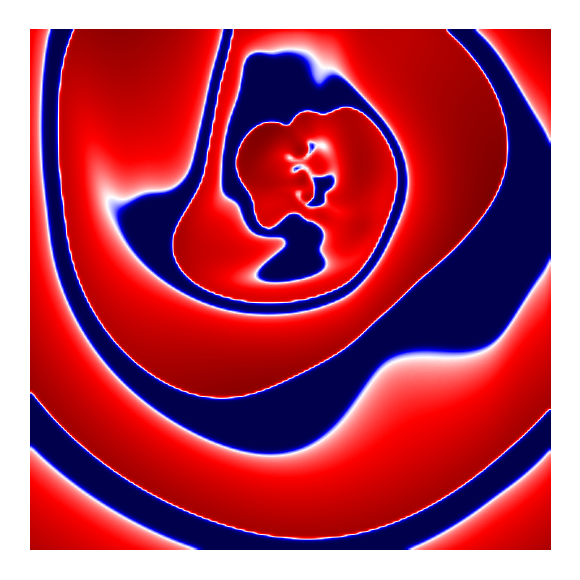

In [21]:
height_mm=45
width_mm=45
N_x=200
N_y=200
N=200*200
plt.figure(figsize=(mm_to_inches(width_mm), mm_to_inches(height_mm)), facecolor='none', dpi=300)
plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)
plt.imshow(u_sol_chaos[:N].reshape(N_x,N_y), cmap='seismic', vmin=np.min((u_sol_chaos[:N])), vmax=np.max(np.abs(u_sol_chaos[:N])), rasterized=True, aspect='auto', interpolation='bilinear')
plt.xticks([])  
plt.yticks([])  
#plt.ylabel("Excitable cells", fontsize=16)
#plt.xlabel("Time (a.u.)", fontsize=16)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().set_rasterized(True)
plt.savefig('Aliev_Panfilov_2D_diffusion_chaos.pdf', **savefig_args)
plt.show()